In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("✅ GPU memory growth enabled")

✅ GPU memory growth enabled


In [16]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [17]:
cnn = tf.keras.models.Sequential()

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))  # Output Layer for 38 classes

In [26]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [30]:
def train_and_test_hybrid(model, training_set, validation_set, epochs=10):
    with tf.device('/GPU:0'):  # Training on GPU
        print("Training on GPU...")
        training_history = model.fit(
            x=training_set,
            validation_data=validation_set,
            epochs=epochs
        )

    with tf.device('/CPU:0'):  # Evaluation on CPU
        print("Evaluating on CPU...")
        model.evaluate(validation_set)

    return training_history

In [32]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20
2197/2197 [==============================] - 1447s 643ms/step - loss: 1.4423 - accuracy: 0.5765 - val_loss: 0.4819 - val_accuracy: 0.8488
Epoch 2/20
2197/2197 [==============================] - 1419s 645ms/step - loss: 0.4582 - accuracy: 0.8551 - val_loss: 0.3014 - val_accuracy: 0.9006
Epoch 3/20
2197/2197 [==============================] - 1407s 640ms/step - loss: 0.2700 - accuracy: 0.9131 - val_loss: 0.2511 - val_accuracy: 0.9181
Epoch 4/20
2197/2197 [==============================] - 1403s 638ms/step - loss: 0.1854 - accuracy: 0.9390 - val_loss: 0.1924 - val_accuracy: 0.9375
Epoch 5/20
2197/2197 [==============================] - 1413s 643ms/step - loss: 0.1385 - accuracy: 0.9555 - val_loss: 0.1915 - val_accuracy: 0.9383
Epoch 6/20
2197/2197 [==============================] - 1412s 642ms/step - loss: 0.1085 - accuracy: 0.9644 - val_loss: 0.1378 - val_accuracy: 0.9558
Epoch 7/20
2197/2197 [==============================] - 14563s 7s/step - loss: 0.0946 - accuracy: 0.9691 -

In [33]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 414s 188ms/step - loss: 0.0107 - accuracy: 0.9969
Training accuracy: 0.9969272613525391


In [35]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 104s 188ms/step - loss: 0.0906 - accuracy: 0.9746
Validation accuracy: 0.9746187329292297


In [38]:
cnn.save('trained_disease_model.h5')

In [40]:
training_history.history #Return Dictionary of history

{'loss': [1.4422773122787476,
  0.45818138122558594,
  0.2700226306915283,
  0.1853739619255066,
  0.1384708732366562,
  0.10845588892698288,
  0.09456896036863327,
  0.07212113589048386,
  0.0674227923154831,
  0.05752367898821831,
  0.05105232447385788,
  0.04575793072581291,
  0.045072127133607864,
  0.03568532317876816,
  0.0358508862555027,
  0.033991217613220215,
  0.03171081095933914,
  0.029641548171639442,
  0.03171573579311371,
  0.02888120710849762],
 'accuracy': [0.5764706134796143,
  0.8551390767097473,
  0.9130521416664124,
  0.9389999508857727,
  0.9555160403251648,
  0.9643787145614624,
  0.969144344329834,
  0.9764421582221985,
  0.9783768653869629,
  0.981492280960083,
  0.9840813875198364,
  0.9854470491409302,
  0.9853901267051697,
  0.9887474179267883,
  0.9887047410011292,
  0.989131510257721,
  0.9904687404632568,
  0.990511417388916,
  0.9902269244194031,
  0.9912938475608826],
 'val_loss': [0.4819334149360657,
  0.30144956707954407,
  0.25108885765075684,
  0.1

In [44]:
import json
with open('training_hist1.json','w') as f:
  json.dump(training_history.history,f)

In [54]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


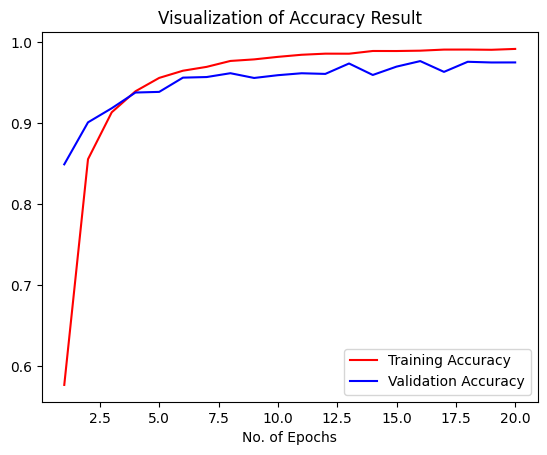

In [56]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [58]:
class_name = validation_set.class_names

In [60]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [61]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 365s 21ms/step


In [63]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [64]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [68]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [70]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       1.00      0.97      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.94      0.97      0.96       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.99      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.93      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

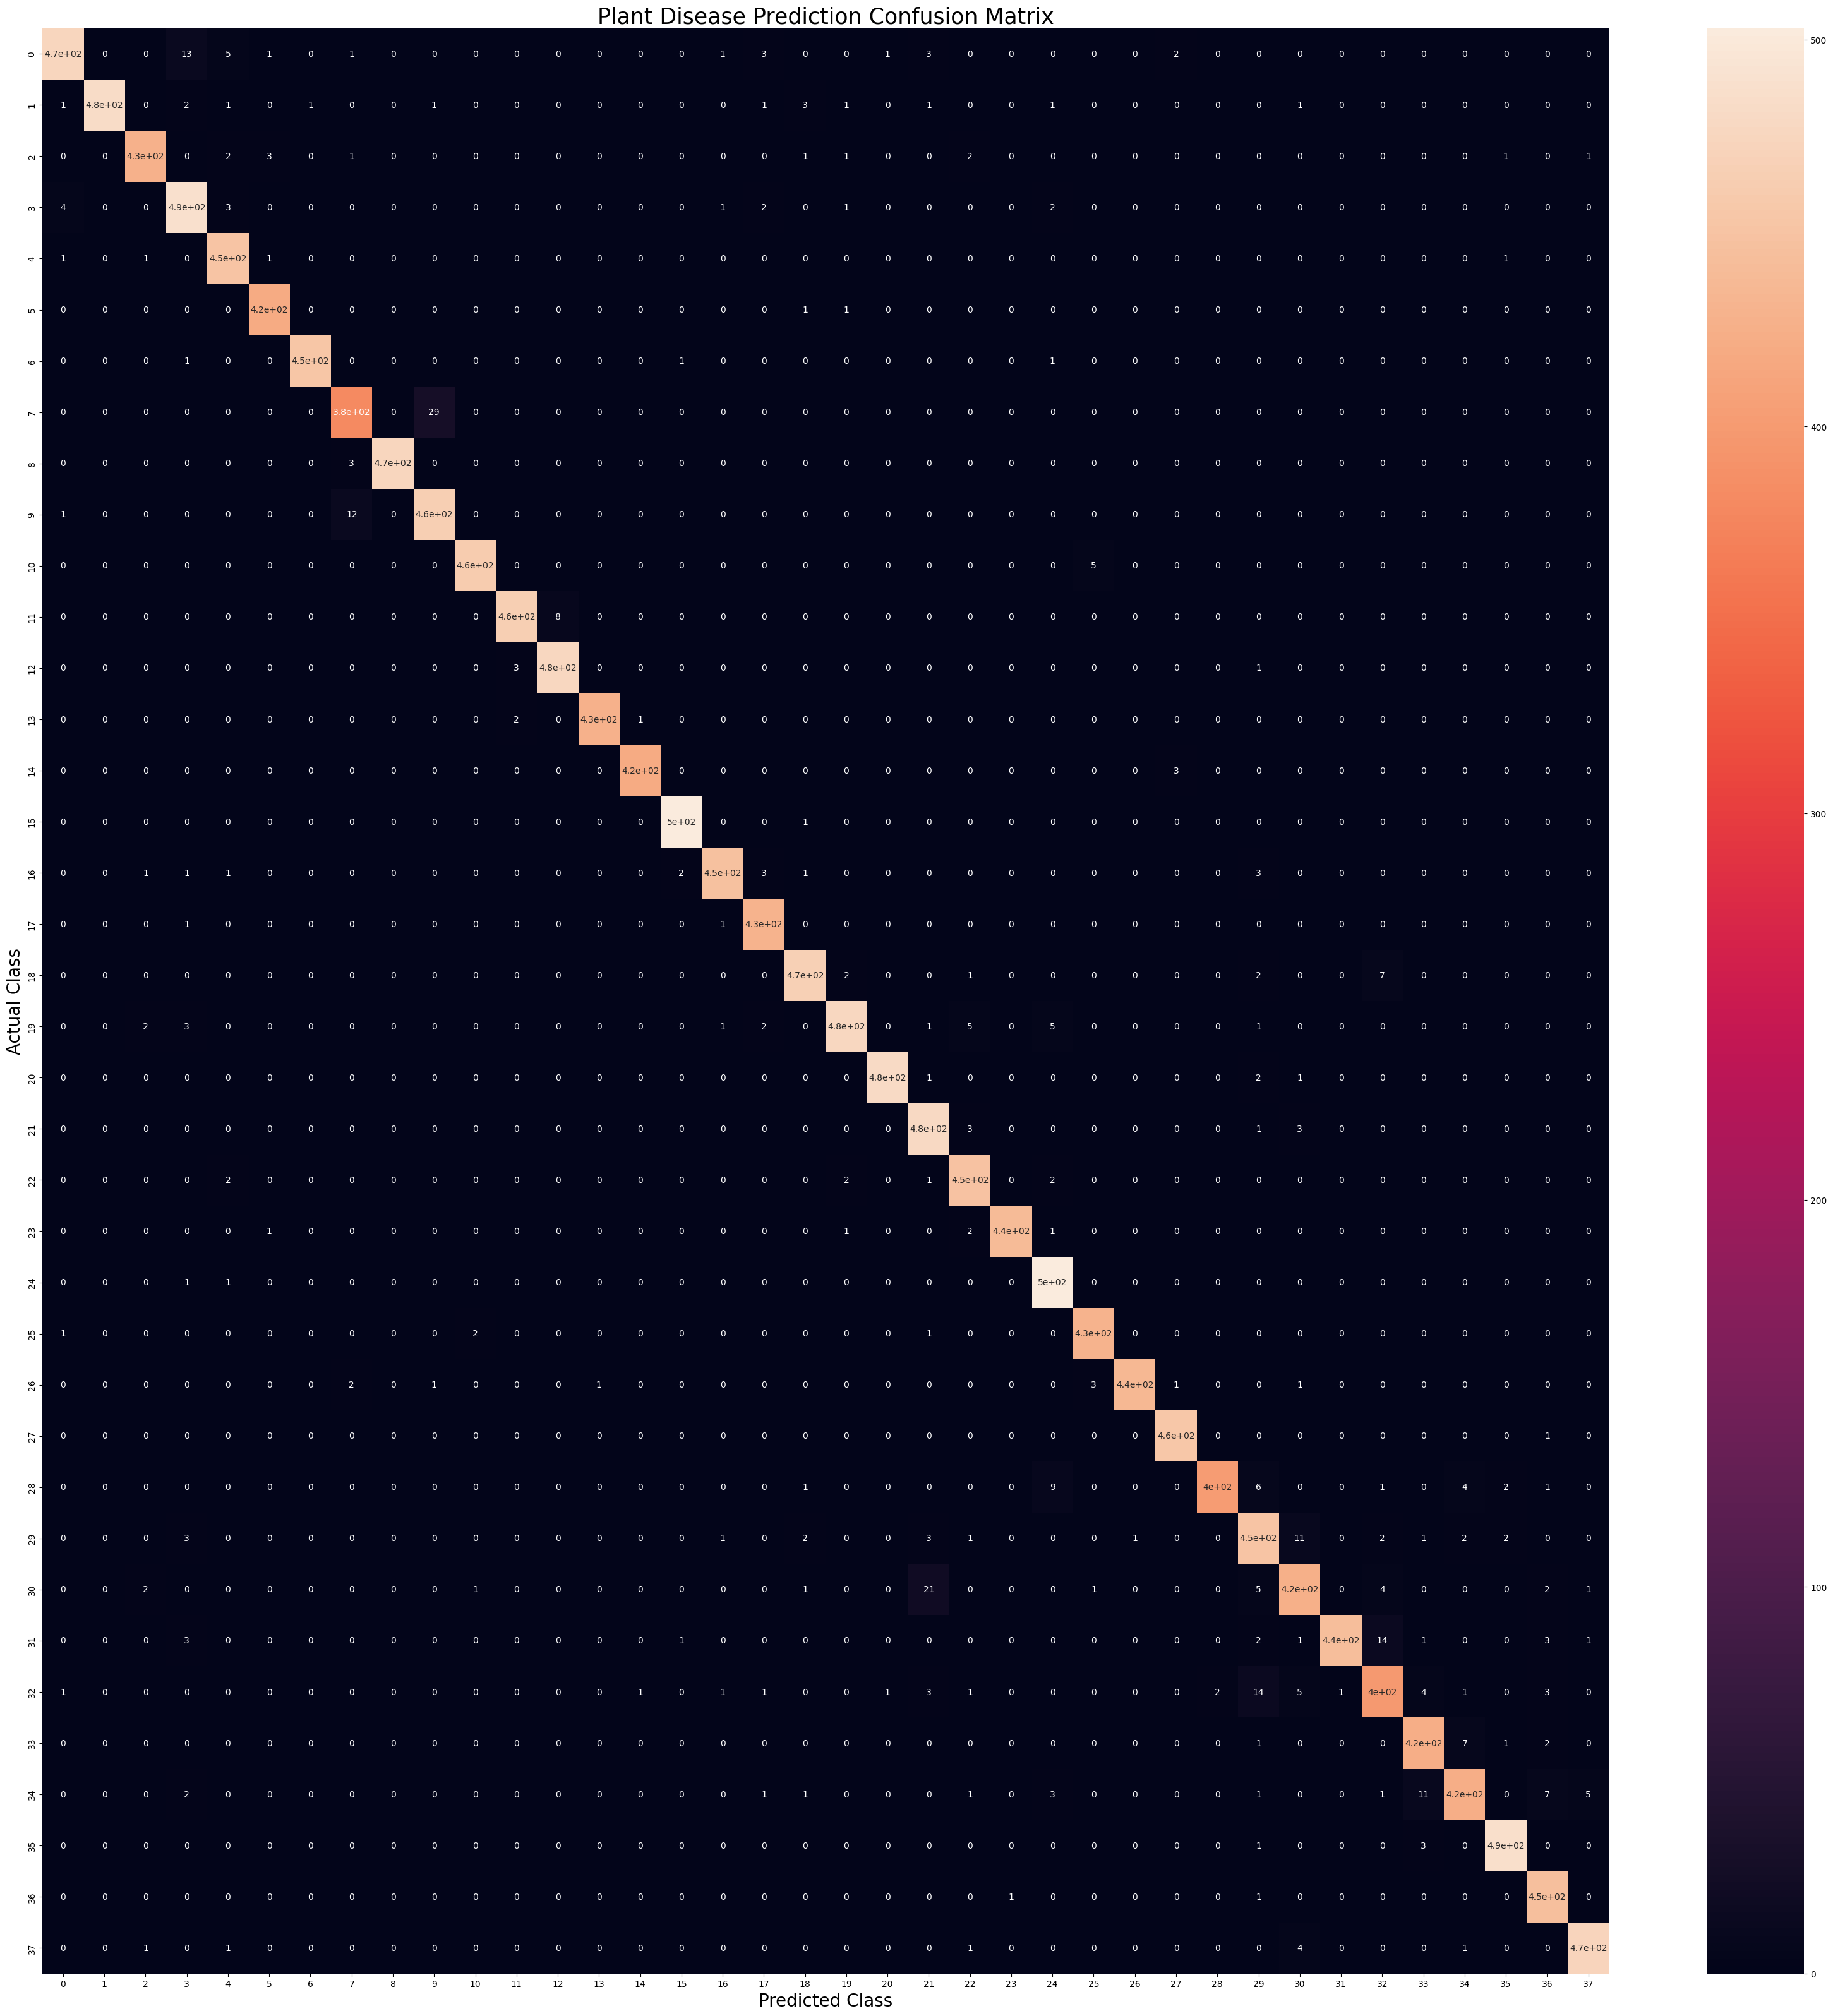

In [72]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()